In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

**READ DATASET**

In [ ]:
df_cust = pd.read_csv('Case Study - Customer.csv', sep=';')
df_product = pd.read_csv('Case Study - Product.csv', sep=';')
df_store = pd.read_csv('Case Study - Store.csv', sep=';')
df_trans = pd.read_csv('Case Study - Transaction.csv', sep=';')

##**EXPLORATORY DATA ANALYSIS**

In [ ]:
df_cust.sample(10)

,CustomerID,Age,Gender,Marital Status,Income
119,120,30,0,Married,"2,48"
378,379,48,1,Married,"17,74"
114,115,39,0,Married,"5,07"
372,373,55,1,Married,"14,59"
397,398,33,0,Married,"7,44"
187,188,46,1,Married,"25,22"
351,352,69,0,Single,"6,15"
35,36,32,1,Married,"10,4"
206,207,35,1,Married,"10,54"
168,169,34,0,Married,"3,97"


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
df_cust.dropna(subset=['Marital Status'], inplace=True)

In [ ]:
# Change data type Income into float
# Change ',' into '.'
df_cust['Income'] = df_cust['Income'].str.replace(',', '.')

# Change data type
df_cust['Income'] = df_cust['Income'].astype(float)

In [ ]:
df_cust.sample(10)

,CustomerID,Age,Gender,Marital Status,Income
25,26,45,1,Married,7.83
263,264,21,1,Single,1.12
304,305,29,1,Married,4.08
165,166,33,0,Married,3.33
149,150,61,1,Married,8.56
51,52,37,0,Married,3.73
217,218,29,0,Married,3.52
38,39,66,1,Married,6.19
253,254,58,0,Single,6.05
418,419,38,1,Married,3.86


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      444 non-null    int64  
 1   Age             444 non-null    int64  
 2   Gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.8+ KB


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [ ]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-62.000000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
df_trans.sample(10)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
2450,TR17485,394,25/06/2022,P8,16000,1,16000,2
1135,TR9604,272,20/03/2022,P3,7500,1,7500,14
3584,TR94664,320,17/09/2022,P9,10000,3,30000,1
1477,TR48476,105,15/04/2022,P10,15000,2,30000,3
244,TR84034,439,17/01/2022,P5,4200,5,21000,8
1625,TR32564,319,27/04/2022,P7,9400,3,28200,6
4768,TR34387,132,13/12/2022,P3,7500,4,30000,3
4557,TR98094,257,27/11/2022,P7,9400,3,28200,12
2766,TR20154,269,18/07/2022,P4,12000,5,60000,5
3817,TR67673,304,02/10/2022,P7,9400,3,28200,5


In [ ]:
# Change data type 'Date' into datetype
df_trans['Date'] = pd.to_datetime(df_trans['Date'], format='%d/%m/%Y')
df_trans['Date'].head()

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Date, dtype: datetime64[ns]

In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


##**MERGE DATA**

In [ ]:
df_merge = pd.merge(df_trans, df_cust, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [ ]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   4976 non-null   object        
 1   CustomerID      4976 non-null   int64         
 2   Date            4976 non-null   datetime64[ns]
 3   ProductID       4976 non-null   object        
 4   Price           4976 non-null   int64         
 5   Qty             4976 non-null   int64         
 6   TotalAmount     4976 non-null   int64         
 7   StoreID         4976 non-null   int64         
 8   Age             4976 non-null   int64         
 9   Gender          4976 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          4976 non-null   float64       
 12  Product Name    4976 non-null   object        
 13  StoreName       4976 non-null   object        
 14  GroupStore      4976 non-null   object        
 15  Type

In [ ]:
df_merge.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.014821,-0.012024,-0.025266,0.005470,-0.021120,-0.015863,0.005440,-0.000485,-0.008277
Price,-0.014821,1.000000,-0.354614,0.440046,-0.031782,0.013781,0.012132,0.000636,-0.014220,-0.007418
Qty,-0.012024,-0.354614,1.000000,0.620804,0.012169,-0.026745,-0.011920,-0.027724,-0.009999,0.007538
TotalAmount,-0.025266,0.440046,0.620804,1.000000,-0.011283,-0.016458,-0.009479,-0.024816,-0.024048,-0.000246
StoreID,0.005470,-0.031782,0.012169,-0.011283,1.000000,-0.004783,0.000449,0.000739,0.543010,-0.242255
Age,-0.021120,0.013781,-0.026745,-0.016458,-0.004783,1.000000,-0.026879,0.485532,-0.007572,0.023614
Gender,-0.015863,0.012132,-0.011920,-0.009479,0.000449,-0.026879,1.000000,-0.067612,0.010022,-0.022346
Income,0.005440,0.000636,-0.027724,-0.024816,0.000739,0.485532,-0.067612,1.000000,0.006318,0.021516
Latitude,-0.000485,-0.014220,-0.009999,-0.024048,0.543010,-0.007572,0.010022,0.006318,1.000000,-0.045423
Longitude,-0.008277,-0.007418,0.007538,-0.000246,-0.242255,0.023614,-0.022346,0.021516,-0.045423,1.000000


##**CLUSTERING WITH KMEANS**

In [ ]:
dfc = df_merge.groupby('CustomerID').agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index().rename(columns={
    'TransactionID' : 'count_transaction',
    'Qty' : 'total_qty',
    'TotalAmount' : 'amount_in_total'
})

In [ ]:
dfc.head()

,CustomerID,count_transaction,total_qty,amount_in_total
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         444 non-null    int64
 1   count_transaction  444 non-null    int64
 2   total_qty          444 non-null    int64
 3   amount_in_total    444 non-null    int64
dtypes: int64(4)
memory usage: 14.0 KB


**CHECK DISTRIBUTION**

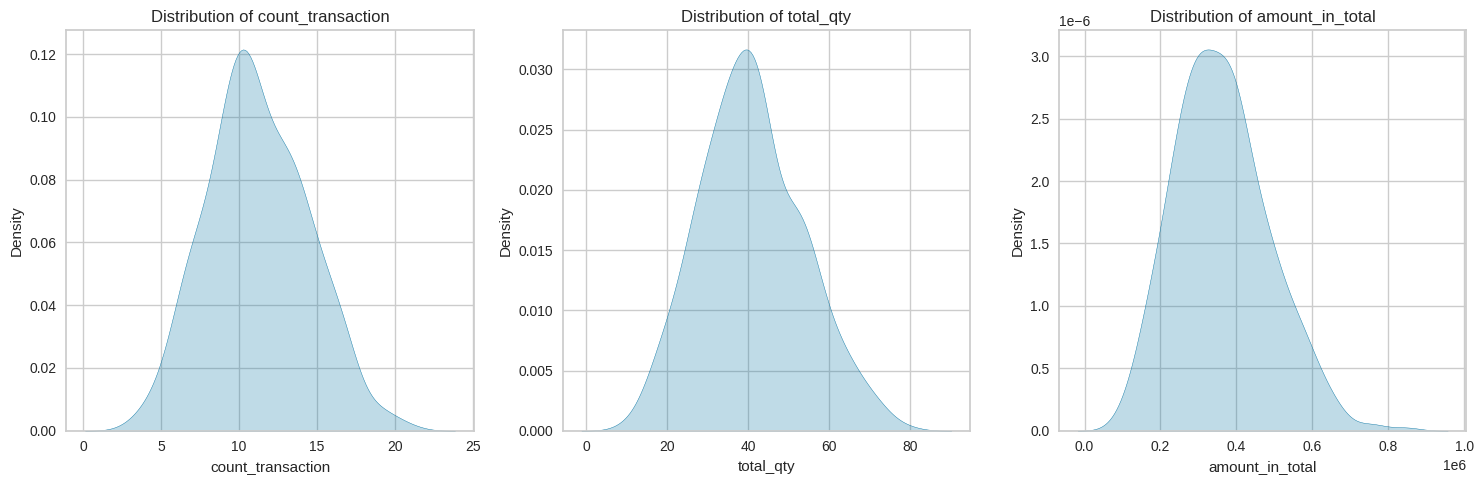

In [ ]:
columns_to_plot = ['count_transaction', 'total_qty', 'amount_in_total']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Create KDE plots for each column
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data=dfc[column], ax=axes[i], shade=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
ftr = ['count_transaction', 'total_qty','amount_in_total']
dfx = dfc[ftr].copy()
dfx.sample(10)

,count_transaction,total_qty,amount_in_total
195,8,31,263100
155,15,65,588100
120,13,35,278100
257,4,22,107600
54,7,20,218800
284,10,27,238200
245,14,45,433800
203,7,31,250000
271,14,54,392000
425,10,41,292500


###**Handling Outliers**

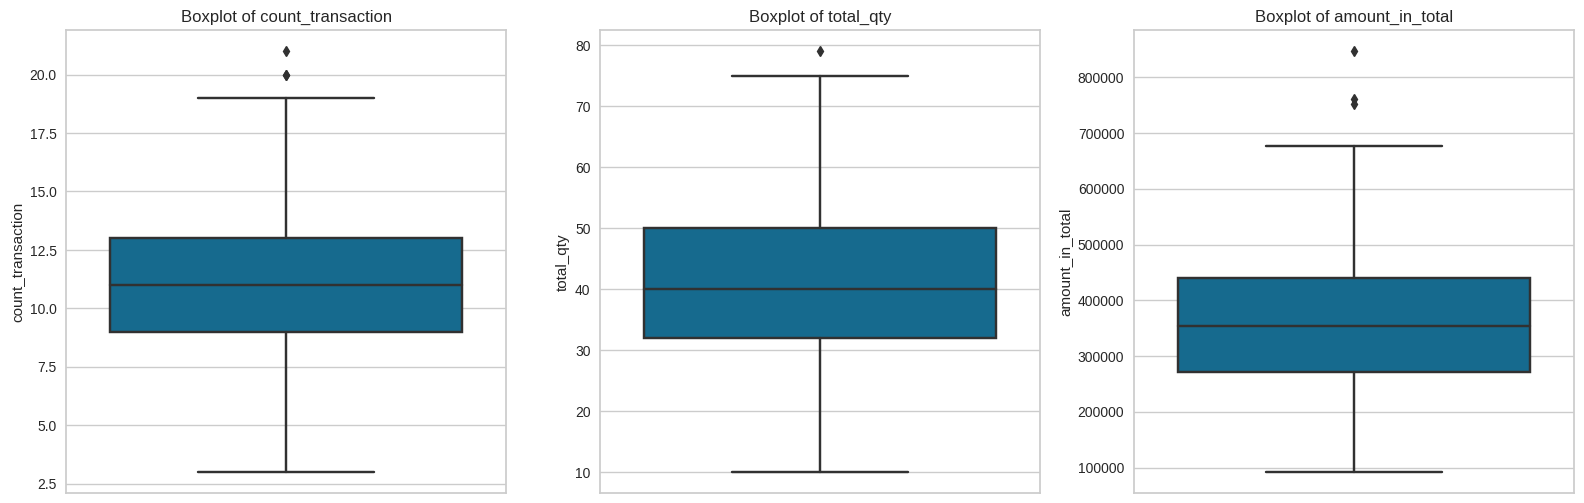

In [ ]:
# Check Outliers
plt.figure(figsize=(16, 10))
for i, column in enumerate(ftr, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dfx, y=column)
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [ ]:
from scipy import stats

columns_to_handle = ['count_transaction', 'total_qty','amount_in_total']

# Calculate the Z-scores for the specified columns
z_scores = np.abs(stats.zscore(dfx[columns_to_handle]))

# Define a Z-score threshold for outlier detection
z_score_threshold = 3

# Create a boolean mask for outliers
outlier_mask = z_scores > z_score_threshold

sum_of_outliers = outlier_mask.sum(axis=0)
print("Sum of outliers for each column:")
for column, count in zip(columns_to_handle, sum_of_outliers):
    print(f"{column}: {count}")

Sum of outliers for each column:
count_transaction: 1
total_qty: 1
amount_in_total: 3


In [ ]:
# Since the outlier is small, then I decided to drop outliers

dfx = dfx[~outlier_mask.any(axis=1)]

In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 443
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   count_transaction  440 non-null    int64
 1   total_qty          440 non-null    int64
 2   amount_in_total    440 non-null    int64
dtypes: int64(3)
memory usage: 13.8 KB


**DATA SCALING**

In [ ]:
data_std = StandardScaler().fit_transform(dfx)
dfx_std = pd.DataFrame(data=data_std, columns = ftr)
dfx_std

,count_transaction,total_qty,amount_in_total
0,1.868864,1.568070,2.219212
1,0.595953,1.326293,0.285145
2,1.232409,1.245701,0.736428
3,-0.358729,0.439778,-0.466713
4,-1.313412,-1.091476,-0.750543
...,...,...,...
435,0.595953,-0.285553,-0.743845
436,2.187091,1.729254,1.837422
437,2.187091,2.212808,1.916962
438,-0.040502,0.117408,0.544696


##**KMEANS**

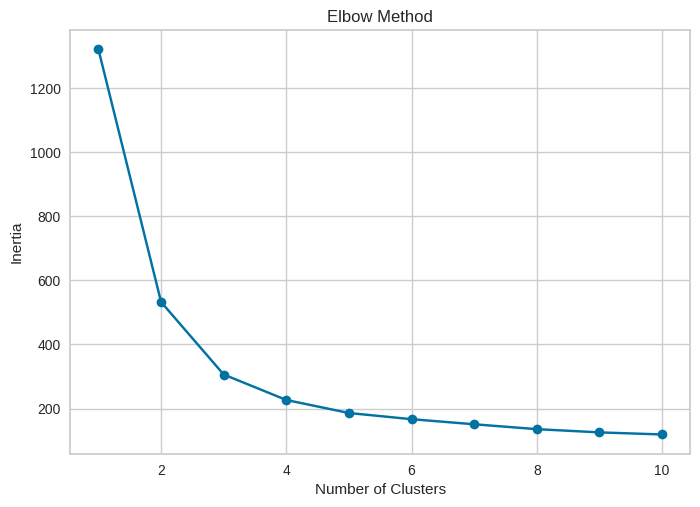

In [ ]:
inertia = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters= num_clusters, init= 'k-means++', max_iter= 100, n_init= 10, random_state= 42)
    kmeans.fit(dfx_std)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    787.622203
1    226.214696
2     79.376052
3     40.626222
4     19.276486
5     15.871794
6     15.211779
7     10.048885
8      6.529192
9           NaN
dtype: float64

In [ ]:
# Difference in percentage per cluster
(pd.Series(inertia) - pd.Series(inertia).shift(-1))/pd.Series(inertia)*100

0    59.668349
1    42.491384
2    25.926067
3    17.913819
4    10.354749
5     9.510655
6    10.073189
7     7.399726
8     5.192123
9          NaN
dtype: float64

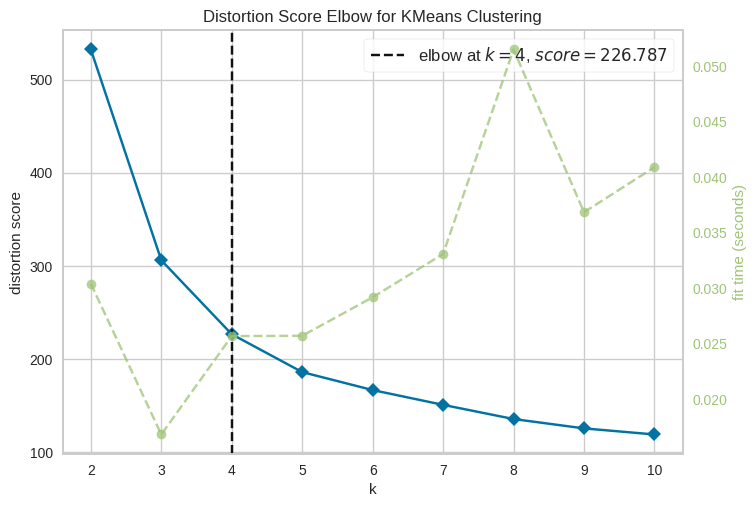

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualization of innertia vs k with parameter distortion

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(dfx_std)
visualizer.show()

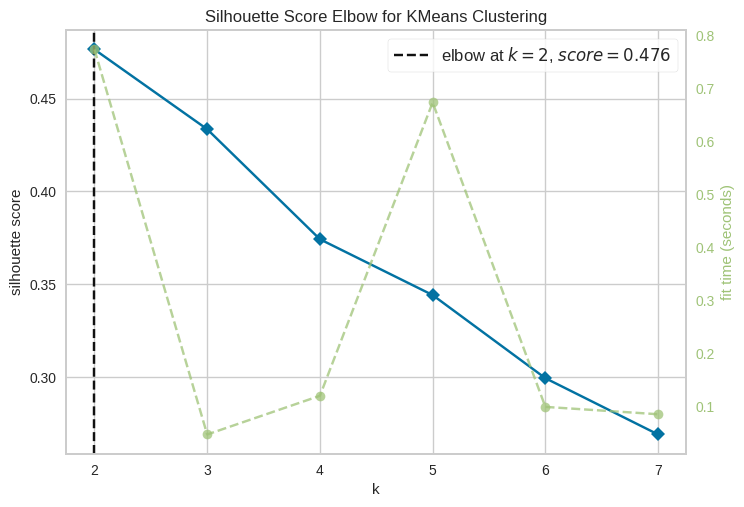

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,8), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(dfx_std)
visualizer.show()

**Then let's check which cluster is the best between 2-4 clusters option.**

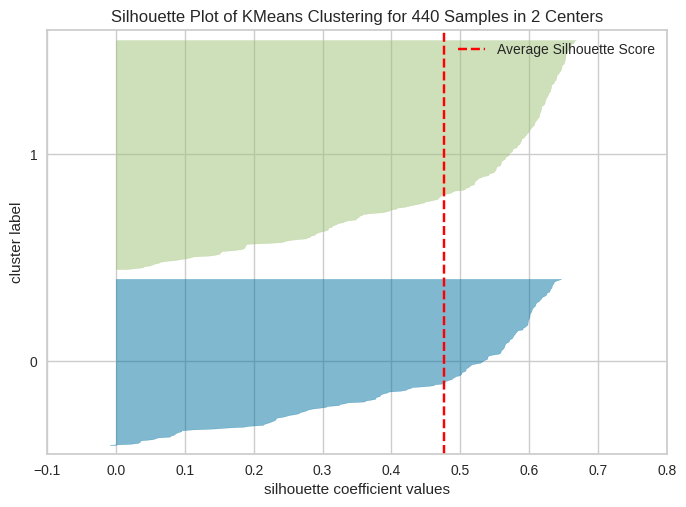

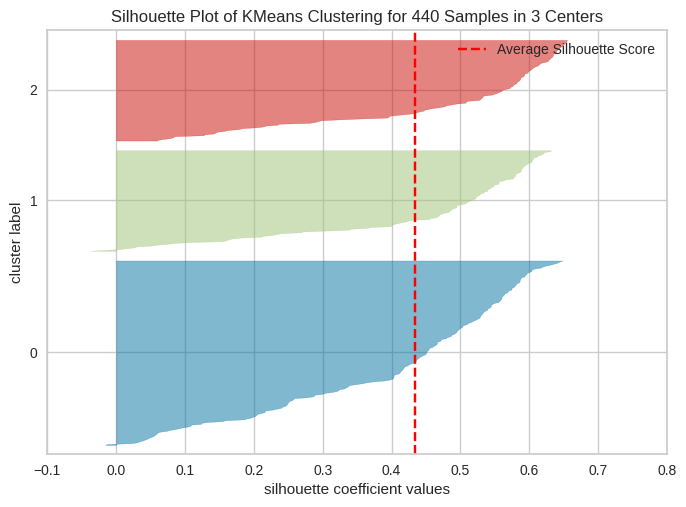

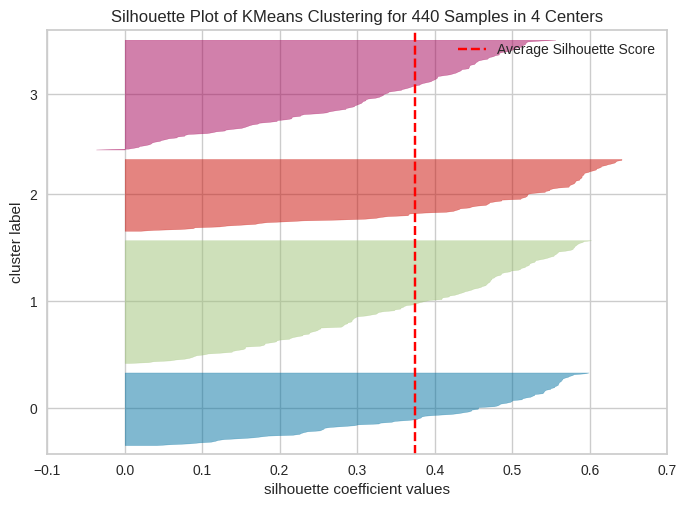

In [ ]:
for num_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Silhouette Visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(dfx_std)
    visualizer.show()

**Based on** reconsidering the K-elbow visualization, margin of each cluster in K-elbow, and the visualization in silhouette coefficient. **I decided** to choose **3 clusters** because this has the best fit based on all cluster finder methods.

##**K-MEANS WITH 2 CLUSTERS**

In [ ]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter= 100, n_init= 10, random_state= 42)
kmeans.fit(dfx_std)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [ ]:
dfx['label'] = kmeans.labels_
dfx

,count_transaction,total_qty,amount_in_total,label
0,17,60,623300,1
1,13,57,392300,1
2,15,56,446200,1
3,10,46,302500,0
4,7,27,268600,2
...,...,...,...,...
439,13,37,269400,0
440,18,62,577700,1
441,18,68,587200,1
442,11,42,423300,0


In [ ]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 443
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   count_transaction  440 non-null    int64
 1   total_qty          440 non-null    int64
 2   amount_in_total    440 non-null    int64
 3   label              440 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 31.6 KB


In [ ]:
#PCA - split
X = dfx.copy().drop(['label'], axis = 1)
Y = dfx['label'].copy()

In [ ]:
#Standard scale data
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

data_label = pd.DataFrame(X_pca, columns = ['A', 'B'])
data_label['label'] = Y
data_label.sample(5)

,A,B,label
285,0.165416,-0.203428,0.0
341,-0.563652,-0.006619,2.0
354,0.210830,0.043628,1.0
416,3.133875,-0.360042,2.0
281,0.016259,0.831325,1.0


In [ ]:
# Check the statistics
data_label.groupby('label').agg(['mean', 'median', 'std', 'count'])

A                                   B                          
           mean    median       std count      mean    median       std count
label                                                                        
0.0   -0.178229 -0.222614  1.431563   208  0.006844 -0.012951  0.403655   208
1.0    0.614729  0.578844  1.763603   113  0.048654  0.046979  0.378945   113
2.0   -0.271111 -0.224645  1.785064   115 -0.061164 -0.061827  0.397772   115

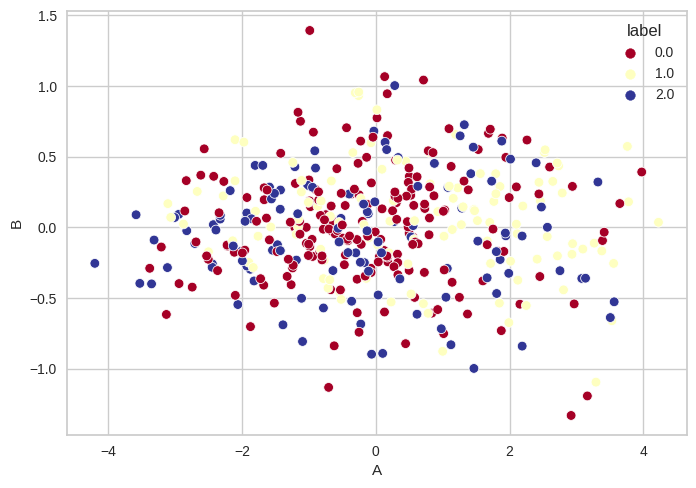

In [ ]:
# Show scatterplot
sns.scatterplot(data=data_label, x='A', y='B', hue='label', palette='RdYlBu')
plt.show()

In [ ]:
print(abs(pca.components_))

[[0.5718316  0.58252818 0.57764137]
 [0.7956804  0.22237728 0.56341907]]


In [ ]:
dfx.columns

Index(['count_transaction', 'total_qty', 'amount_in_total', 'label'], dtype='object')

In [ ]:
dfx['label'] = kmeans.labels_
dfx.groupby('label').agg(['mean', 'median', 'std'])

count_transaction                   total_qty                   \
                   mean median       std       mean median       std   
label                                                                  
0             11.038095   11.0  1.447147  39.919048   40.0  5.398752   
1             15.008696   15.0  1.641008  56.191304   55.0  6.868305   
2              7.408696    7.0  1.555385  26.034783   26.0  5.793115   

      amount_in_total                          
                 mean    median           std  
label                                          
0       351652.857143  352350.0  54244.563297  
1       508469.565217  499400.0  71242.367611  
2       220050.434783  228900.0  49783.262483

In [ ]:
# Check the ratio of each cluster in percentage

cluster_count = dfx['label'].value_counts().reset_index()
cluster_count.columns = ['label', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(dfx))*100,2)
cluster_count = cluster_count.sort_values(by=['label']).reset_index(drop=True)
cluster_count

,label,count,percentage (%)
0,0,210,47.73
1,1,115,26.14
2,2,115,26.14


In [76]:
# Due to huge gap between feature 'amount_in_total' and the others, then convert it into a decimal after 4 digits
dfx['amount_in_total'] = dfx['amount_in_total'] / 10000.0
dfx.describe()

,count_transaction,total_qty,amount_in_total,label
count,440.000000,440.000000,440.000000,440.000000
mean,11.127273,40.543182,35.824295,0.784091
std,3.145982,12.422258,11.957341,0.832824
min,3.000000,10.000000,9.210000,0.000000
25%,9.000000,32.000000,26.937500,0.000000
50%,11.000000,40.000000,35.235000,1.000000
75%,13.000000,49.250000,43.932500,2.000000
max,19.000000,73.000000,67.620000,2.000000


##**CLUSTER CHARACTERISTICS**

Text(0, 0.5, 'Value')

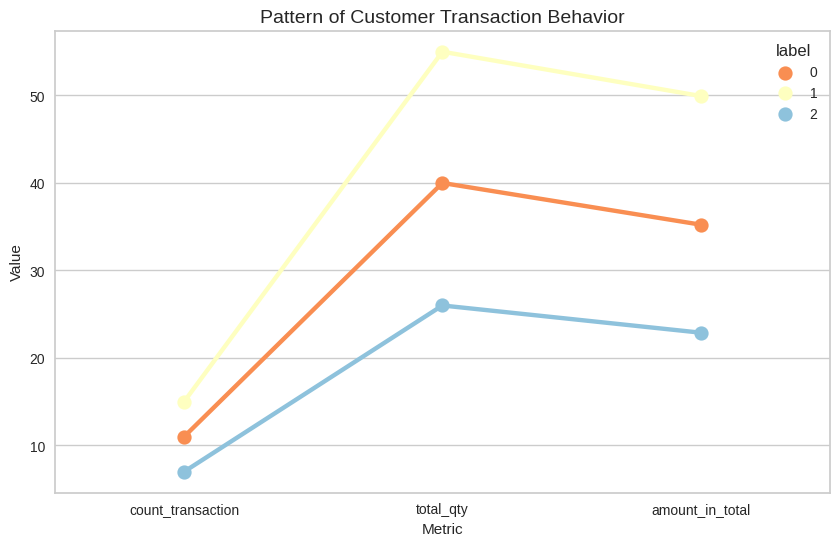

In [77]:
# Check each cluster's pattern

cluster_med=dfx.groupby('label').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='label', value_vars=ftr, var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='label', palette='RdYlBu')
plt.title('Pattern of Customer Transaction Behavior', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

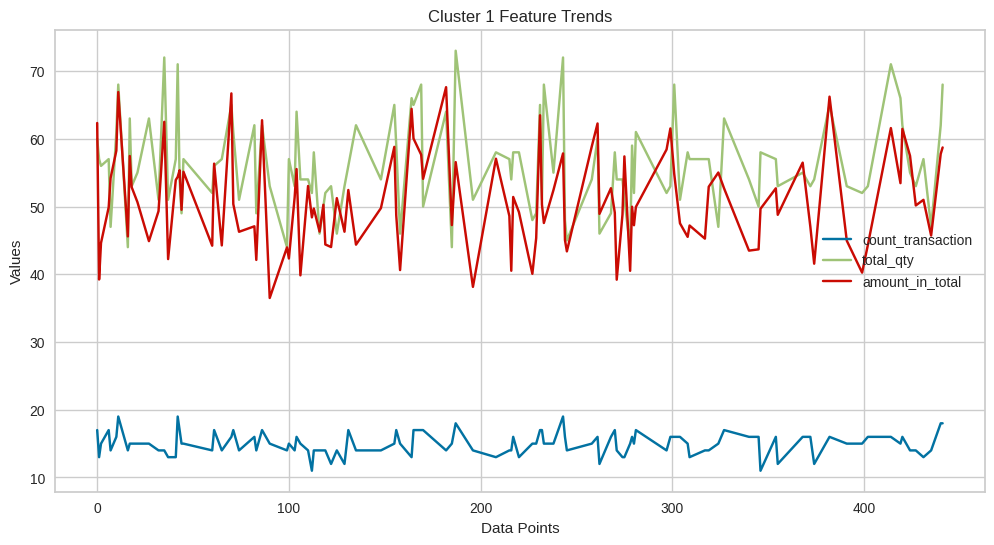

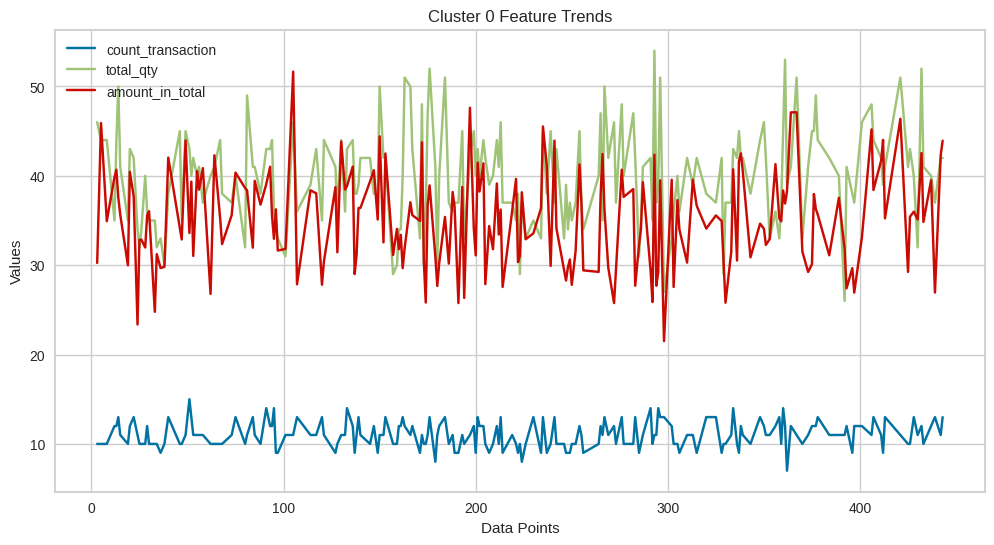

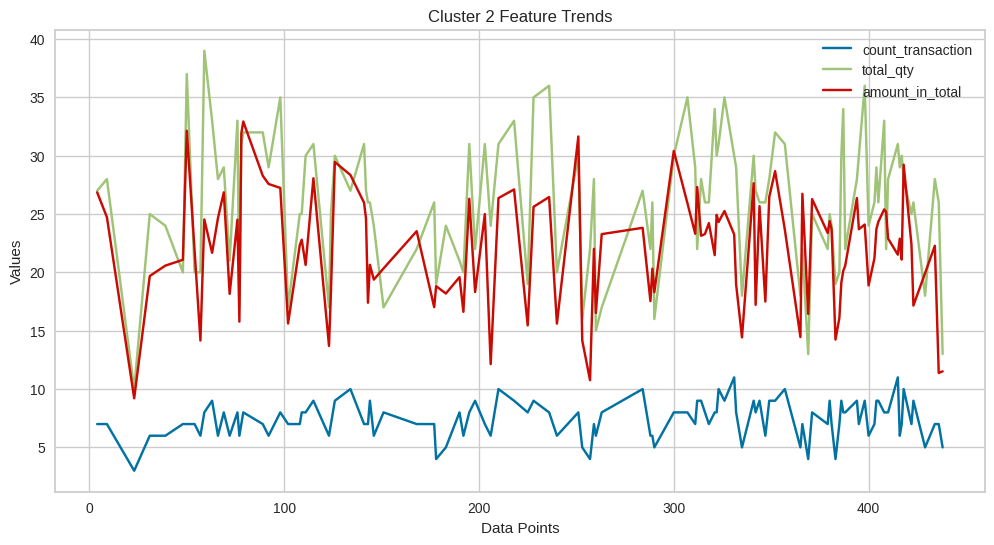

In [78]:
# Create line graphs for each cluster
clusters = dfx['label'].unique()

for cluster in clusters:
    cluster_data = dfx[dfx['label'] == cluster]
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_data['count_transaction'], label='count_transaction')
    plt.plot(cluster_data['total_qty'], label='total_qty')
    plt.plot((cluster_data['amount_in_total']), label='amount_in_total')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.title(f'Cluster {cluster} Feature Trends')
    plt.legend()
    plt.show()

###**CLUSTER CHARACTERISTICS**

Based on the charts above, it can be seen and differentiate that:

**Cluster 0: Cluster Middle Class**
*   Middle transaction volume
*   Middle sum of qty purchased
*   Middle total amount of money being spent
*   Majority customer cluster (210 cust)

**Cluster 1: Cluster High Class**
*   High transaction volumen
*   High sum of qty purchased
*   High total amount of money being spent
*   Top contributors to the company's revenue
*   Total 115 customers

**Cluster 2: Cluster Low Class**
*   Low transaction volume
*   Low sum of qty purchased
*   Low total amount of money being spent
*   Total 115 customers

#**CONCLUSION**

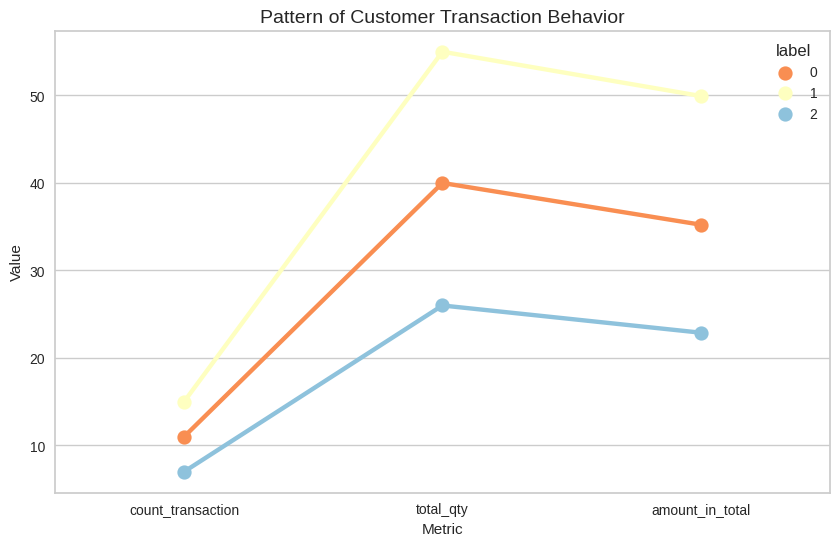

###**Recommendations:**

1.   **The majority** of the customer segment being in the **middle class** (cluster 0) with a total 210 customers. Then, company better **be focus on handling this cluster.** With a hope that more customer become High Class cluster.
2.   By the quantity of people in cluster 1 and 2 is **equally the same**. It indicates that the company should not let cluster 2 (Low Class) behind. With a total of **115 customers**, it still has a prospect yet to be upgraded in a Mid or even High cluster.
3.   Obviously, the company should **maintenance their relation with High Class cluster** (cluster 1) because they are the **company's top revenue contributors.** **A priority-like program** can be implemented to **make them stay** as the top revenue contributors.
4.   **Such example program** that can be implemented **for cluster 0 and 2** is that: conduct a program like **clearance sale** and **product bundle promotion** special for this customer segment. This action can **increase customer's transaction, qty purchase and the total amount spend.**



